In [1]:
import platform
print(platform.python_version())

3.7.3


In [2]:
import warnings
warnings.filterwarnings(action = 'once')

In [3]:
# import dataiku
import csv
import pandas as pd
import numpy as np
# from dataiku import pandasutils as pdu
import os
from rdkit import Chem
from rdkit.Chem import PandasTools
from rdkit.Chem import Descriptors
from rdkit.ML.Descriptors import MoleculeDescriptors
from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole
import re
from statistics import mean
import matplotlib.pyplot as plt

In [4]:
col_names =  ['PA_ID', 'SMILES', 'Tm']
dfA  = pd.DataFrame(columns = col_names)

suppl = Chem.SDMolSupplier('AFile.sdf')
for mol in suppl:
    if mol is None: continue
    if mol.GetNumAtoms() < 1: continue
    try:
        dfA.loc[len(dfA)] = [mol.GetProp('PA_ID'), Chem.MolToSmiles(mol), mol.GetProp('Tm')]
    except:
        continue


In [5]:
dfA.shape

(1578, 3)

In [6]:
dfA.sample(5).head()

PA_ID                                   SMILES  \
420   A1071               CCC(C)OP(=S)(OC(C)CC)S[Na]   
392   A1016                 O=P(O)(C1CCCCC1)C1CCCCC1   
596   A1472                     CN1C(=O)Oc2ccccc2C1O   
1149  A2251               O=C(O)CCCCCCCCCCCCCCC(=O)O   
505   A1244  CC1=CC(=C2C=C(C)C(=O)C(C)=C2)C=C(C)C1=O   

                                                   Tm  
420   1.300000000000000e+002 - 1.350000000000000e+002  
392   1.460000000000000e+002 - 1.480000000000000e+002  
596   1.270000000000000e+002 - 1.285000000000000e+002  
1149  1.240000000000000e+002 - 1.260000000000000e+002  
505   2.030000000000000e+002 - 2.060000000000000e+002

In [7]:
txt = dfA.loc[150, 'Tm']
x = txt.split(" - ")
if len(x) == 1:
    melt_temp = float(x[0])
else:
    y = (float(x[0]), float(x[1]))
    melt_temp = mean(y)

In [8]:
def meltTemp(value):
    x = value.split(" - ")
    if len(x) == 1:
        melt_temp = float(x[0])
    else:
        y = (float(x[0]), float(x[1]))
        melt_temp = mean(y)
    return(melt_temp)

In [9]:
for i, row in dfA.iterrows():
    dfA.loc[i, 'melt_temp'] = meltTemp(dfA.loc[i, 'Tm'])

In [10]:
dfA.sample(5).head()

PA_ID                                             SMILES  \
1437  A2600  CC(C)(C)c1cc(C(C)(C)C)c(O)c(Cn2c(=O)n(Cc3c(O)c...   
696   A1637  CCCCCCCCCCCCCCCCCCOC(=O)CSCc1c(C)cc(C(C)(C)C)c...   
26      A48                     COC(=O)CCP(CCC(=O)OC)CCC(=O)OC   
1286  A2417  Cc1cc(C(C)(C)C)c(OP(=S)(Oc2ccc(C(C)(C)C)cc2)Oc...   
953   A1988        Cc1cc(C(C)(C)C)c(O)c(C)c1CNC(C)(C)CC(C)(C)C   

                                                   Tm  melt_temp  
1437                           0.000000000000000e+000        0.0  
696   5.000000000000000e+001 - 5.100000000000000e+001       50.5  
26                             2.200000000000000e+002      220.0  
1286  1.820000000000000e+002 - 1.850000000000000e+002      183.5  
953   7.000000000000000e+001 - 7.100000000000000e+001       70.5

In [11]:
type(dfA['melt_temp'])

pandas.core.series.Series

In [12]:
dfA['melt_temp'].array

<PandasArray>
[ 131.0,  178.0,  218.0, 102.05,  194.5,   97.3,   83.5,  106.0,   66.0,
   67.0,
 ...
  124.0,  232.0,  109.0,  105.0,  142.0,  144.0,  131.0,  109.0,  147.0,
  130.5]
Length: 1578, dtype: float64

(array([66.,  0.,  7., 22., 24., 48., 54., 66., 65., 70., 77., 91., 79.,
        90., 84., 89., 68., 64., 76., 78., 57., 50., 35., 54., 34., 26.,
        32., 15., 21.,  6.,  6.,  9.,  3.,  2.,  4.,  2.,  2.,  0.,  1.,
         0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]),
 array([  0,  10,  20,  30,  40,  50,  60,  70,  80,  90, 100, 110, 120,
        130, 140, 150, 160, 170, 180, 190, 200, 210, 220, 230, 240, 250,
        260, 270, 280, 290, 300, 310, 320, 330, 340, 350, 360, 370, 380,
        390, 400, 410, 420, 430, 440, 450, 460, 470, 480, 490]),
 <a list of 49 Patch objects>)

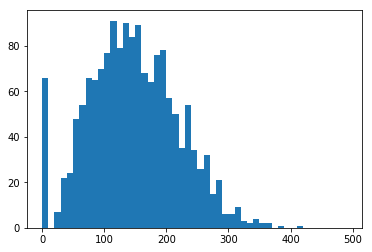

In [13]:
plt.hist(dfA['melt_temp'].array, bins = range(0, 500, 10))

In [14]:
dfA.to_csv('AFile.csv')

In [15]:
dfA.loc[[0]]

PA_ID                                           SMILES  \
0    A1  Cc1cc(Cc2cc(C)cc(C(C)(C)C)c2O)c(O)c(C(C)(C)C)c1   

                                                Tm  melt_temp  
0  1.300000000000000e+002 - 1.320000000000000e+002      131.0

In [16]:
molsA = []
with open('AFile.csv') as csvfile:
    readCSV = csv.reader(csvfile, delimiter=',')
    for row in readCSV:
        m = Chem.MolFromSmiles(row[2])
        molsA.append((m, row[1]))

In [17]:
row

['1577',
 'A2968',
 'Cc1cc(SCCC(=O)OCc2c(C)cc(C(C)(C)C)c(O)c2C)cc(C(C)(C)C)c1O',
 '1.284000000000000e+002 - 1.326000000000000e+002',
 '130.5']

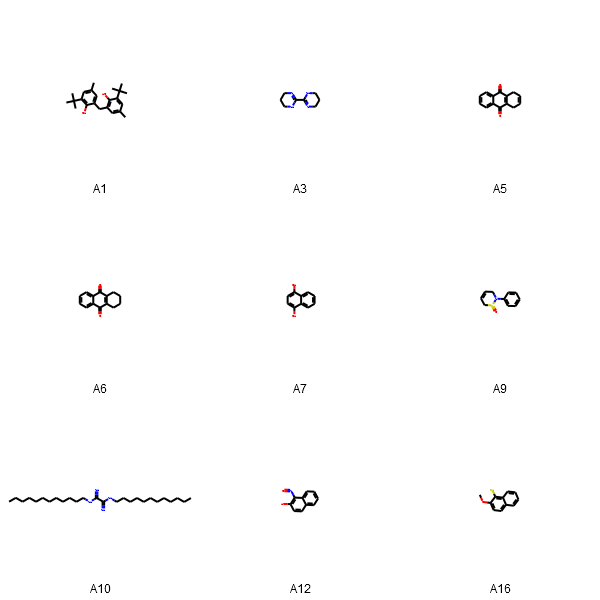

In [18]:
Draw.MolsToGridImage([m[0] for m in molsA[1:10]],
                    legends=[m[1] for m in molsA[1:10]],
                    molsPerRow=3)

In [19]:
col_names =  ['PA_ID', 'SMILES', 'prop']
dfP  = pd.DataFrame(columns = col_names)

suppl = Chem.SDMolSupplier('PFile.sdf')
for mol in suppl:
    if mol is None: continue
    if mol.GetNumAtoms() < 1: continue
    try:
        dfP.loc[len(dfP)] = [mol.GetProp('PA_ID'), Chem.MolToSmiles(mol), mol.GetProp('Amax')]
    except:
        continue
    

In [20]:
dfP.shape

(2035, 3)

In [21]:
dfP.to_csv('PFile.csv')

In [22]:
molsP = []
with open('PFile.csv') as csvfile:
    readCSV = csv.reader(csvfile, delimiter=',')
    for row in readCSV:
        m = Chem.MolFromSmiles(row[2])
        molsP.append((m, row[1]))

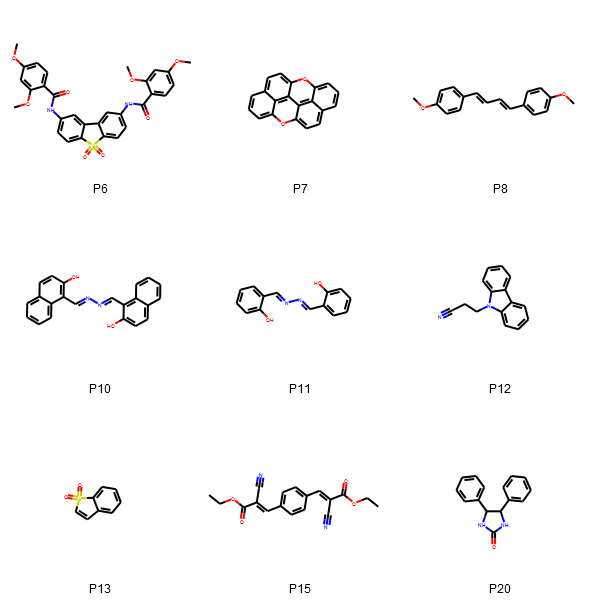

In [23]:
Draw.MolsToGridImage([m[0] for m in molsP[1:10]],
                    legends=[m[1] for m in molsP[1:10]],
                    molsPerRow=3)

In [24]:
molsP[1:10]

[(<rdkit.Chem.rdchem.Mol at 0xbeaa580>, 'P6'),
 (<rdkit.Chem.rdchem.Mol at 0xbeaad00>, 'P7'),
 (<rdkit.Chem.rdchem.Mol at 0xbeaa3a0>, 'P8'),
 (<rdkit.Chem.rdchem.Mol at 0xbeaa8a0>, 'P10'),
 (<rdkit.Chem.rdchem.Mol at 0xbeaada0>, 'P11'),
 (<rdkit.Chem.rdchem.Mol at 0xbeaad50>, 'P12'),
 (<rdkit.Chem.rdchem.Mol at 0xbeaa7b0>, 'P13'),
 (<rdkit.Chem.rdchem.Mol at 0xbeaa760>, 'P15'),
 (<rdkit.Chem.rdchem.Mol at 0xbeaa210>, 'P20')]

In [25]:
dfP.shape

(2035, 3)

In [26]:
from rdkit import DataStructs
from rdkit.ML.Cluster import Butina

In [27]:
fps = []
for m, pa_id in molsP[1:]:
    fps.append(Chem.RDKFingerprint(m, maxPath=5))
    
dist_matrix = []
num_fps = len(fps)
for i in range(1, num_fps):
    similarities = DataStructs.BulkTanimotoSimilarity(fps[i], fps[:i])
    dist_matrix.extend([1-x for x in similarities])
    
clusters = Butina.ClusterData(dist_matrix, num_fps, 0.5, isDistData=True)
print("number of clusters = ", len(clusters))
num_clust_g5 = len([c for c in clusters if len(c) > 5])
print("number of clusters with more than 5 compounds = ", num_clust_g5)

number of clusters =  393
number of clusters with more than 5 compounds =  52


<IPython.core.display.Javascript object>


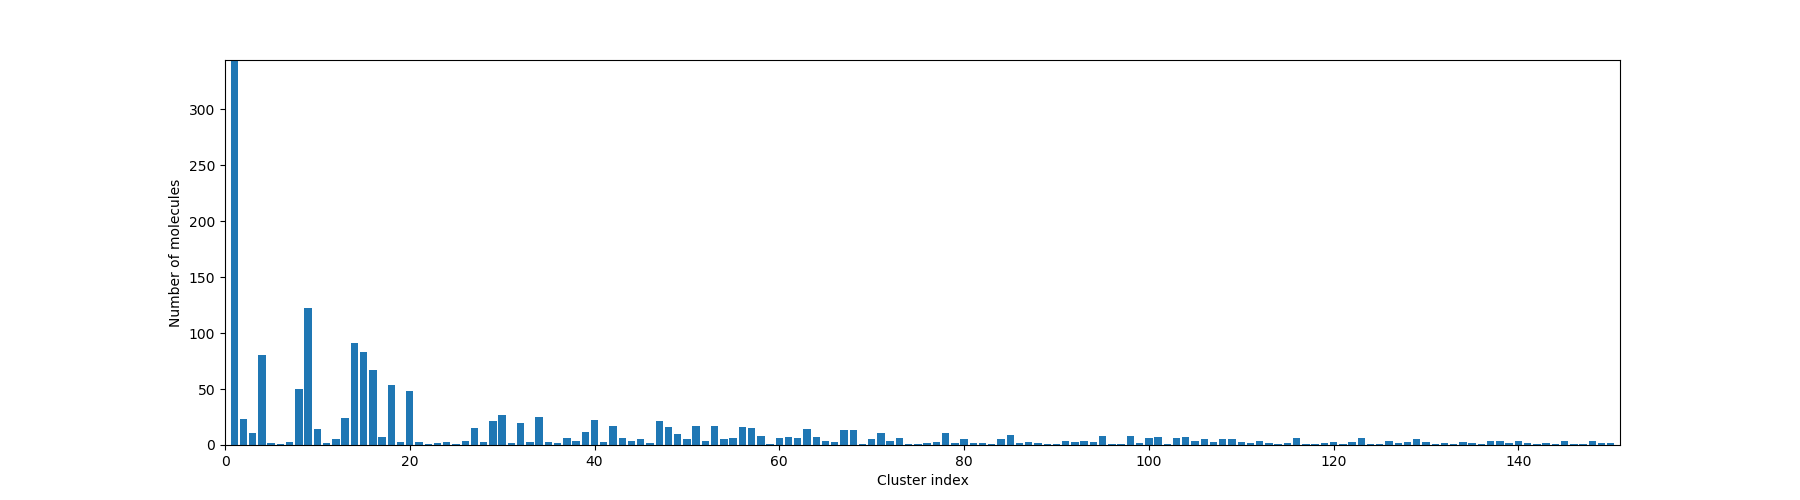

In [28]:
%matplotlib notebook
import matplotlib.pyplot as plt
fig = plt.figure(1, figsize=(18,5))
plt1 = plt.subplot(111)
plt.axis([0, 151, 0, len(clusters[0])+1])
plt.xlabel('Cluster index')
plt.ylabel('Number of molecules')
plt1.bar(range(1, 151), [len(c) for c in clusters[:150]], lw = 0)
plt.show()

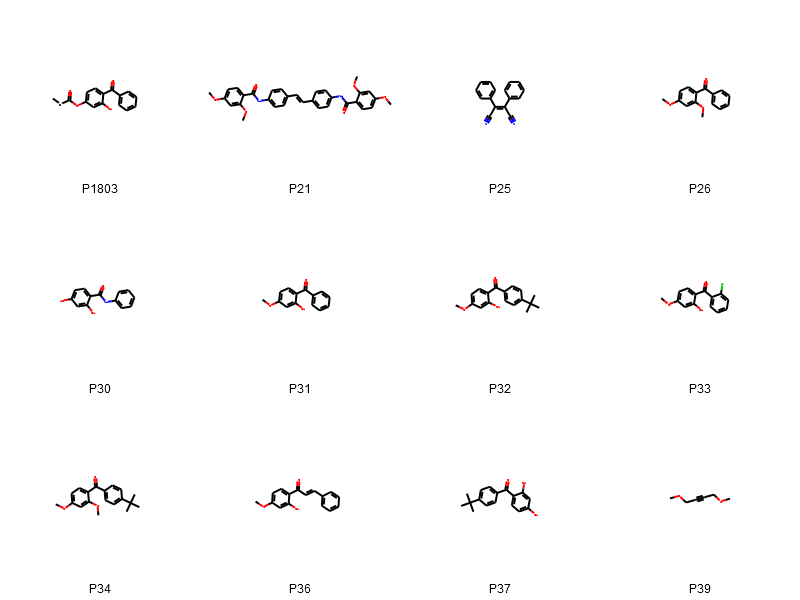

In [29]:
Draw.MolsToGridImage([molsP[i][0] for i in clusters[0][:12]],
                    legends=[molsP[i][1] for i in clusters[0][:12]],
                    molsPerRow = 4)